# Run the file containing the functions used in this script
## By default this is a file called "methane_functions.r" in the working directory of this script
## Do NOT change the working directory at any point while using this script.

In [73]:
# is this the folder with the script in it?
scriptDir<-getwd()
scriptDir

# if not, uncomment and use this instead
# scriptDir<-""

[1] "/home/pleocavee/Documents/github/SensorDataProcessing/rriv_methane"

In [25]:
methaneFunctions<-paste(scriptDir,"/methane_functions.r",sep="")
methaneFunctions
if (file.exists(methaneFunctions)){
    source(methaneFunctions)
} else {
    print("manually correct the location and/or name of methane_functions.r")
}

[1] "/home/pleocavee/Documents/github/SensorDataProcessing/rriv_methane/methane_functions.r"

# 0. Load packages used

In [4]:
# Package names
packages <- c("dplyr", "doBy", "lubridate", "ggplot2", "Hmisc", "zoo", "viridis")
packageHandler(packages)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘doBy’


The following object is masked from ‘package:dplyr’:

    order_by



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: viridisLite



# 1. Locate data directory:

In [5]:
# 2023-04-25 was a startLogging run, so it has no summary lines
directory<-"~/Desktop/data/Methane Calibration/Methane_Calibration_Ian/20230425" #Ken's location

# 2. Create output directory:

In [7]:
# output path
outputDir<-paste0(directory,"_output")

# function to create a new directory if necessary
newDir(dirPath = outputDir)

[1] "~/Desktop/data/Methane Calibration/Methane_Calibration_Ian/20230425_output"

Output directory not found, creating: ~/Desktop/data/Methane Calibration/Methane_Calibration_Ian/20230425_output


# 3. Read in data from both LGR and RRIV

In [26]:
#note: can separate paths for LGR and RRIV if you want, otherwise it should work anyways based off of filetypes
rriv_data<-concat_dirs(directory, read_rriv_CSV, filePattern=".CSV", minFileSize=400)
rriv_data<-process_rriv_columns(rriv_data)

[1] "Dataframe generated, manually process column types if necessary"


In [65]:
# range(rriv_data$time.h)

In [29]:
# names(rriv_data)

In [30]:
# str(rriv_data)

In [35]:
lgr_data<-concat_dirs(directory, read_GA_ZIP, "*.zip$", 300)
clean_temp() # delete unzipped files

[1] "Dataframe generated, manually process column types if necessary"


In [37]:
str(lgr_data$Time)
lgr_data$Time<-lubridate::as_datetime(lgr_data$Time) # process time column from character
str(lgr_data$Time)

 POSIXct[1:165], format: "2023-04-25 17:56:01" "2023-04-25 17:57:42" "2023-04-25 17:59:24" ...


In [64]:
# range(lgr_data$Time)

In [55]:
# align time frames of both data sets
start<-max(range(rriv_data$time.h)[1],range(lgr_data$Time)[1])
end<-min(range(rriv_data$time.h)[2],range(lgr_data$Time)[2])

rriv_data_overlap<-rriv_data[rriv_data$time.h>start & rriv_data$time.h<end,]
range(rriv_data_overlap$time.h)
lgr_data_overlap<-lgr_data[lgr_data$Time>start & lgr_data$Time<end,]
range(lgr_data_overlap$Time)

[1] "2023-04-25 17:56:02 UTC" "2023-04-25 22:33:31 UTC"

[1] "2023-04-25 17:57:42 UTC" "2023-04-25 22:31:50 UTC"

In [57]:
names(rriv_data)
names(lgr_data)

[1] "type"             "site"             "logger"           "deployment"      
 [5] "deployed_at"      "uuid"             "time.s"           "time.h"          
 [9] "battery.V"        "measurementCycle" "burstCycle"       "aht_C"           
[13] "aht_RH"           "ch4rf_raw"        "ch4rf_cal"        "ch4_raw"         
[17] "ch4_cal"          "user_note"        "user_value"

[1] "Time"               "X.CH4._ppm"         "X.CH4._ppm_sd"     
 [4] "X.CO2._ppm"         "X.CO2._ppm_sd"      "X.H2O._ppm"        
 [7] "X.H2O._ppm_sd"      "X.CH4.d_ppm"        "X.CH4.d_ppm_sd"    
[10] "X.CO2.d_ppm"        "X.CO2.d_ppm_sd"     "GasP_torr"         
[13] "GasP_torr_sd"       "GasT_C"             "GasT_C_sd"         
[16] "AmbT_C"             "AmbT_C_sd"          "RD0_us"            
[19] "RD0_us_sd"          "RD1_us"             "RD1_us_sd"         
[22] "RD0_raw_us"         "LTC0_v"             "LTC0_v_sd"         
[25] "LTC1_v"             "LTC1_v_sd"          "HZ"                
[28] "HZ_sd"              "Batt_v"             "Batt_v_sd"         
[31] "BattPer"            "BattPer_sd"         "Temp_Status_mA"    
[34] "Analyzer_Status_mA" "Fit_Flag"           "MIU_VALVE"         
[37] "MIU_DESC"

# 4. Initial Plots

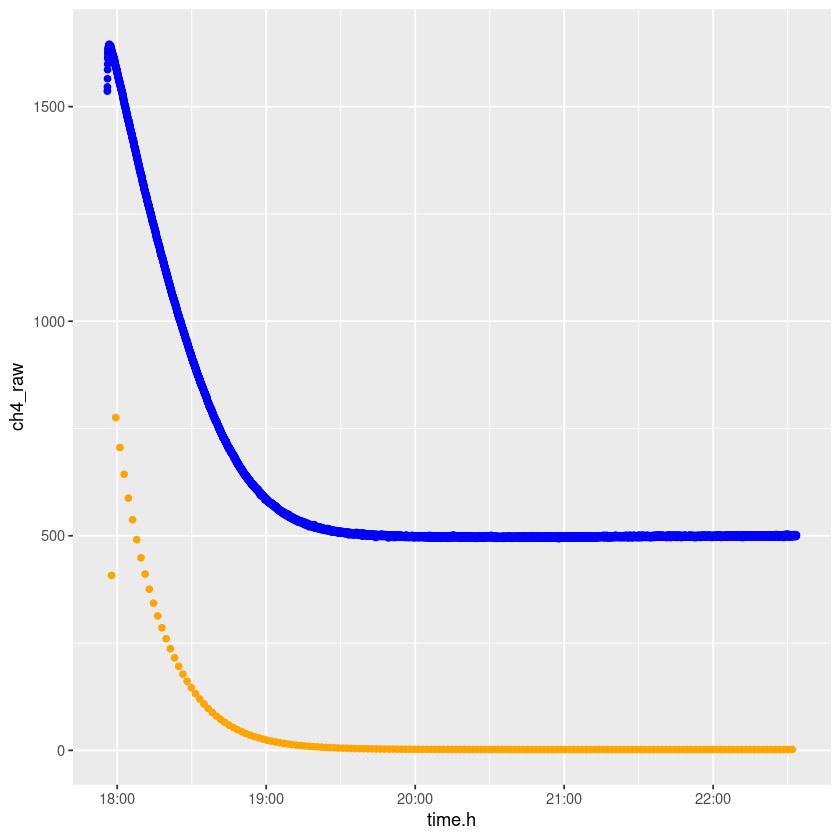

In [63]:
ggplot()+
    geom_point(data=rriv_data_overlap, aes(x=time.h,y=ch4_raw),color="blue")+
    geom_point(data=lgr_data_overlap, aes(x=Time,y=X.CH4._ppm),color="orange")

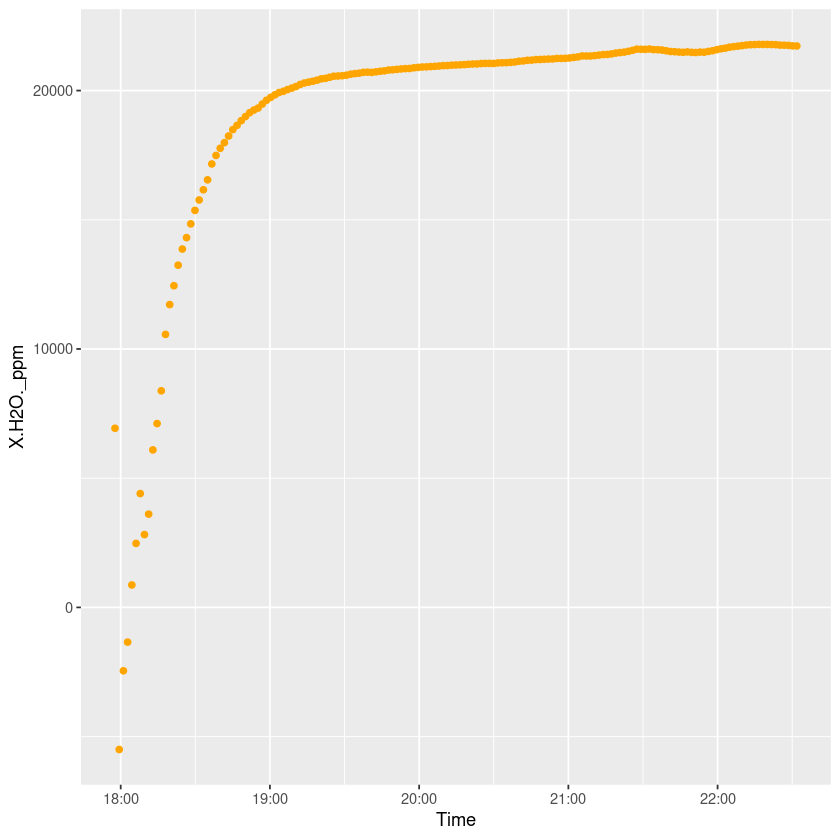

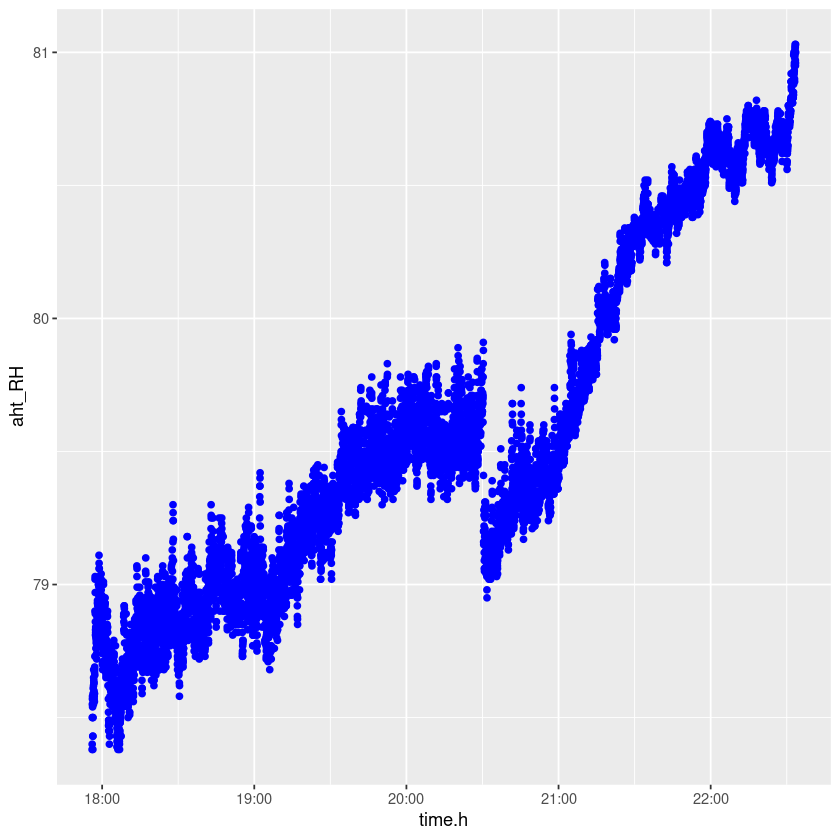

In [72]:
ggplot()+
    geom_point(data=lgr_data_overlap, aes(x=Time,y=X.H2O._ppm),color="orange")

ggplot()+
    geom_point(data=rriv_data_overlap, aes(x=time.h,y=aht_RH),color="blue")


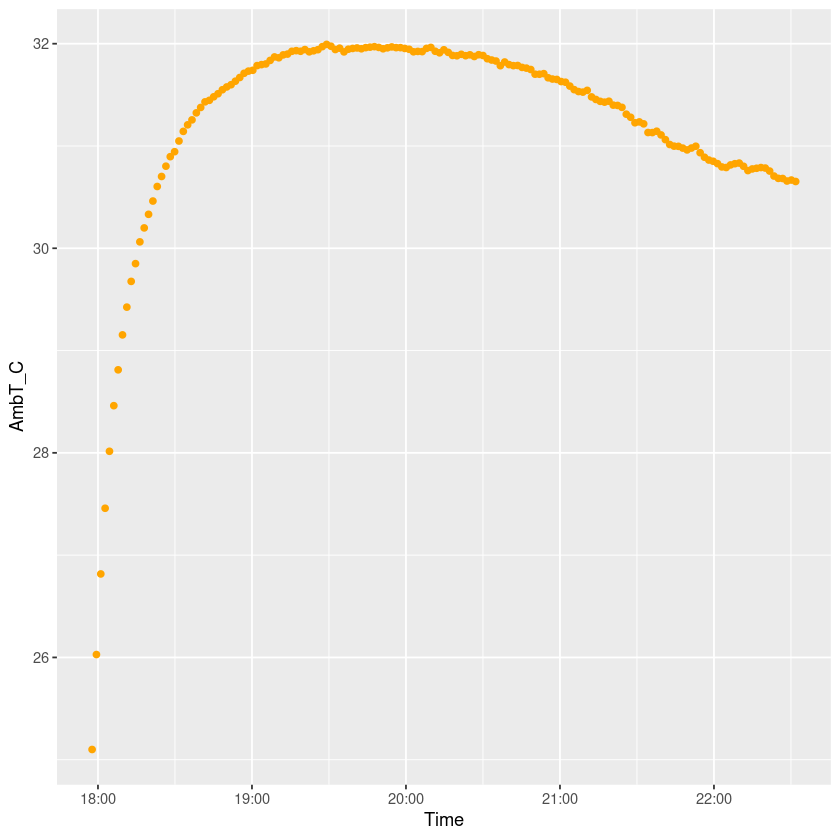

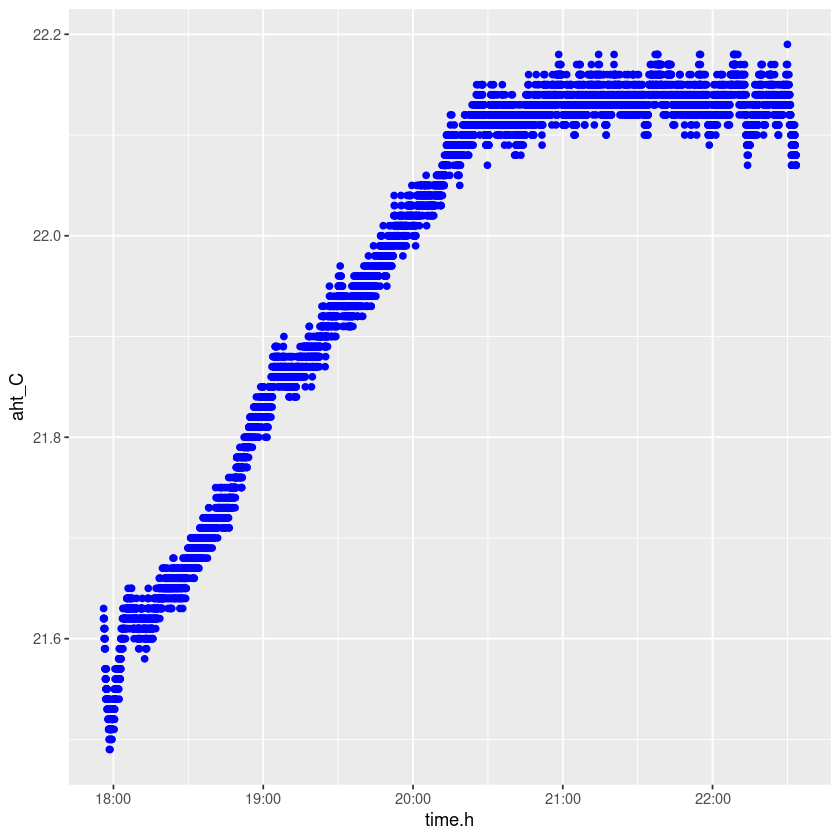

In [71]:
ggplot()+
    geom_point(data=lgr_data_overlap, aes(x=Time,y=AmbT_C),color="orange")

ggplot()+
    geom_point(data=rriv_data_overlap, aes(x=time.h,y=aht_C),color="blue")

